Assignment 7 (Week 7) Note:

Late submissions are penalized.
Only GitHub submissions are acceptable. 

## Name: OLADOKE FUNMILOLA LATEEFAT


Please show and display ALL your calculations and results.

Remember to read the instructions carefully.

In [ ]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Sequence

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# # Black code formatter (Optional)
# %load_ext lab_black

In [ ]:
Data Dictionary
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 

Objective

Predict whether a person makes over 50K a year.

Qs 1. Build a machine learning model that predicts the salary.

Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

Note:

The assignment should be submitted through a public GitHub repository.

In [ ]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data

In [ ]:
# Load Data

import csv

df = pd.read_csv("salary.csv")



df.head()


,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

In [ ]:
# Check for NaNs
df.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [ ]:
# Check for the shape

print(f"Shape of data: {df.shape}\n")


Shape of data: (32560, 15)



In [ ]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
df.loc[df["Education"].str.contains("Preschool"), "Educationnew"] = "Preschool"
df.loc[df["Education"].str.contains("11th,9th,7th-8th,5th-6th,10th,1st-4th,12th"), "Educationnew"] = "1st to 12th Grade"
df.loc[df["Education"].str.contains("HS-grad"), "Educationnew"] = "Grad"
df.loc[df["Education"].str.contains("Some-college"), "Educationnew"] = "College"
df.loc[df["Education"].str.contains("Bachelors"), "Educationnew"] = "Bachelors"
df.loc[df["Education"].str.contains("Masters"), "Educationnew"] = "Masters"
df.loc[df["Education"].str.contains("Assoc-acdm"), "Educationnew"] = "Associate"
df.loc[df["Education"].str.contains("Assoc-voc"), "Educationnew"] = "Associate"
df.loc[df["Education"].str.contains("Doctorate"), "Educationnew"] = "Doctorate"
df.loc[df["Education"].str.contains("Prof-school"), "Educationnew"] = "Prof"


df["Educationnew"].unique()

array(['Bachelors', 'Grad', '1st to 12th Grade', 'Masters', nan,
       'College', 'Associate', 'Doctorate', 'Prof', 'Preschool'],
      dtype=object)

In [ ]:
df["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [ ]:
df.loc[df["Marital_status"].str.contains("Married-civ-spouse"), "Marital_statusnew"] = "Married"
df.loc[df["Marital_status"].str.contains("Married-spouse-absent"), "Marital_statusnew"] = "Married"
df.loc[df["Marital_status"].str.contains("Married-AF-spouse"), "Marital_statusnew"] = "Married"
df.loc[df["Marital_status"].str.contains("Never-married"), "Marital_statusnew"] = "Single"
df.loc[df["Marital_status"].str.contains("Separated"), "Marital_statusnew"] = "Separated"
df.loc[df["Marital_status"].str.contains("Divorced"), "Marital_statusnew"] = "Divorced"
df.loc[df["Marital_status"].str.contains("Widowed"), "Marital_statusnew"] = "Widowed"


df["Marital_statusnew"].unique()

array(['Married', 'Divorced', 'Single', 'Separated', 'Widowed'],
      dtype=object)

In [ ]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df.loc[df["Workclass"].str.contains("Self-emp-not-inc"), "Workclassnew"] = "Self-employed"
df.loc[df["Workclass"].str.contains("Self-emp-inc"), "Workclassnew"] = "Self-employed"
df.loc[df["Workclass"].str.contains("Private"), "Workclassnew"] = "Private"
df.loc[df["Workclass"].str.contains("Local-gov"), "Workclassnew"] = "Local-gov"
df.loc[df["Workclass"].str.contains("State-gov"), "Workclassnew"] = "State-gov"
df.loc[df["Workclass"].str.contains("Federal-gov"), "Workclassnew"] = "Federal-gov"
df.loc[df["Workclass"].str.contains("Without-pay"), "Workclassnew"] = "Without-pay"
df.loc[df["Workclass"].str.contains("Never-worked"), "Workclassnew"] = "Never-worked"



df["Workclassnew"].unique()

array(['Self-employed', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', nan, 'Without-pay', 'Never-worked'], dtype=object)

In [ ]:
# Map the variables
edu_level_mapper = {
    0: "nan",
    1: "Preschool",
    2: "Grad",
    3: "College",
    4: "Bachelors",
    5: "Masters",
    6: "Doctorate",
    7: "Associate",
    8: "Prof",
    
} 
edu_vars = ["Education"]

marital_status_mapper = {
    1: "Single",
    2: "Married",
    3: "Separated",
    4: "Divorced",
    5: "Widowed",
}
marital_vars = ["Marital_status"]

salary_mapper = {
    1: "<=50k",
    2: ">50k",
}
salary_vars = ["salary"]

sex_mapper = {
    1: "Male",
    2: "Female",
}
sex_vars = ["Sex"]

work_class_mapper = {
    0: "nan",
    1: "Never-worked",
    2: "Without-pay",
    3: "Self-employed",
    4: "Private",
    5: "Local-gov",
    6: "State-gov",
    7: "Federal-gov",
}
workclass_vars = ["Workclass"]

In [ ]:
def map_the_variables(
    *, df: pd.DataFrame, features: list, mapper: dict
) -> pd.DataFrame:
    """This is used to map the specified features with the mapper."""
    data = df.copy()
    for feat in features:
        data[feat] = df[feat].map(mapper)
    return df

In [ ]:
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Educationnew
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Grad
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1st to 12th Grade
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Masters


In [ ]:
# Map the variables

data_mapped = df.copy()

# Map the Education variables
data_mapped = map_the_variables(
    df=data_mapped, features=edu_vars, mapper=edu_level_mapper
)

# Map Marital Status
data_mapped = map_the_variables(
    df=data_mapped, features=marital_vars, mapper=marital_status_mapper
)

# # Map Salary
# data_mapped = map_the_variables(
#     df=data_mapped, features=salary_vars, mapper=salary_mapper
# )

# Map Sex
data_mapped = map_the_variables(
    df=data_mapped, features=sex_vars, mapper=sex_mapper
)

# # Map Workclass
# data_mapped = map_the_variables(
#     df=data_mapped, features=work_class_vars, mapper=workclass_mapper
# )

data_mapped.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Marital_statusnew,Educationnew,Workclassnew
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Married,Bachelors,Self-employed
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Divorced,Grad,Private
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Married,NaN,Private
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Married,Bachelors,Private
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Married,Masters,Private


In [ ]:
df["Salary"].value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Salary, dtype: float64

In [ ]:
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Salary"

In [ ]:
from sklearn.model_selection import train_test_split

# Independent features (Matrix)
X = df.drop(columns=TARGET)

# Target variable (Vector)
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((26048, 15), (6512, 15))

In [ ]:
X_train.isna().sum()

Age                  0
Workclass            0
Final_weight         0
Education            0
Education_num        0
Marital_status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Country              0
Educationnew      2456
dtype: int64

In [ ]:
X_test.isna().sum()

Age                 0
Workclass           0
Final_weight        0
Education           0
Education_num       0
Marital_status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Country             0
Educationnew      571
dtype: int64

In [ ]:
X_train["Education"].value_counts(normalize=True).mul(100)

 HS-grad         32.428593
 Some-college    22.224355
 Bachelors       16.300676
 Masters          5.378532
 Assoc-voc        4.234490
 11th             3.601044
 Assoc-acdm       3.274724
 10th             2.956081
 7th-8th          1.996314
 Prof-school      1.769810
 9th              1.597052
 12th             1.343673
 Doctorate        1.213145
 5th-6th          0.998157
 1st-4th          0.537469
 Preschool        0.145885
Name: Education, dtype: float64

In [ ]:
X_train["Marital_status"].value_counts(normalize=True).mul(100)

 Married-civ-spouse       45.965141
 Never-married            32.674294
 Divorced                 13.747697
 Separated                 3.217138
 Widowed                   3.040541
 Married-spouse-absent     1.278409
 Married-AF-spouse         0.076781
Name: Marital_status, dtype: float64

In [ ]:
X_train["Occupation"].value_counts(normalize=True).mul(100)

 Craft-repair         12.642045
 Prof-specialty       12.595977
 Exec-managerial      12.557586
 Adm-clerical         11.574785
 Sales                11.229269
 Other-service        10.127457
 Machine-op-inspct     6.150184
 ?                     5.697174
 Transport-moving      4.937039
 Handlers-cleaners     4.203778
 Farming-fishing       3.071253
 Tech-support          2.767967
 Protective-serv       1.980958
 Priv-house-serv       0.441493
 Armed-Forces          0.023034
Name: Occupation, dtype: float64

In [ ]:
X_train["Workclass"].value_counts(normalize=True).mul(100)

 Private             69.813421
 Self-emp-not-inc     7.785627
 Local-gov            6.292230
 ?                    5.681818
 State-gov            3.885135
 Self-emp-inc         3.443643
 Federal-gov          3.048219
 Without-pay          0.034552
 Never-worked         0.015356
Name: Workclass, dtype: float64

In [ ]:
X_train["Sex"].value_counts(normalize=True).mul(100)

 Male      66.799754
 Female    33.200246
Name: Sex, dtype: float64

In [ ]:
X_train[["Education"]].apply(lambda df: pd.value_counts(df, normalize=True)).mul(
    100
).T

,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
Education,32.428593,22.224355,16.300676,5.378532,4.23449,3.601044,3.274724,2.956081,1.996314,1.76981,1.597052,1.343673,1.213145,0.998157,0.537469,0.145885


In [ ]:
X_train[["Marital_status"]].apply(lambda df: pd.value_counts(df, normalize=True)).mul(
    100
).T

,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
Marital_status,45.965141,32.674294,13.747697,3.217138,3.040541,1.278409,0.076781


In [ ]:
X_train[["Sex"]].apply(lambda df: pd.value_counts(df, normalize=True)).mul(
    100
).T

,Male,Female
Sex,66.799754,33.200246


In [ ]:
X_train[["Workclass"]].apply(lambda df: pd.value_counts(df, normalize=True)).mul(
    100
).T

In [ ]:
# Map the variables
edu_level_mapper = {
    0: "nan",
    1: "Preschool",
    2: "Grad",
    3: "College",
    4: "Bachelors",
    5: "Masters",
    6: "Doctorate",
    7: "Associate",
    8: "Prof",
    
} 
edu_vars = ["Education"]

marital_status_mapper = {
    1: "Single",
    2: "Married",
    3: "Separated",
    4: "Divorced",
    5: "Widowed",
}
marital_vars = ["Marital_status"]

salary_mapper = {
    1: "<=50k",
    2: ">50k",
}
salary_vars = ["salary"]

sex_mapper = {
    1: "Male",
    2: "Female",
}
sex_vars = ["Sex"]

work_class_mapper = {
    0: "nan",
    1: "Never-worked",
    2: "Without-pay",
    3: "Self-employed",
    4: "Private",
    5: "Local-gov",
    6: "State-gov",
    7: "Federal-gov",
}
workclass_vars = ["Workclass"]

In [ ]:
Education_labels_to_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Marital_status_labels_to_keep = [1, 2, 3, 4, 5]
Workclass_labels_to_keep = [0, 1, 2, 3, 4, 5, 6, 7]
Sex_labels_to_keep = [1, 2]
replace_val = "others"

# ===== Education =====
X_train["Educationnew"] = np.where(
    X_train["Educationnew"].isin(Education_labels_to_keep), X_train["Educationnew"], replace_val
)
X_test["Education"] = np.where(
    X_test["Education"].isin(Education_labels_to_keep), X_test["Education"], replace_val
)

# ===== Marital_status =====
X_train["Marital_status"] = np.where(
    X_train["Marital_status"].isin(Marital_status_labels_to_keep), X_train["Marital_status"], replace_val
)
X_test["Marital_status"] = np.where(
    X_test["Marital_status"].isin(Marital_status_labels_to_keep), X_test["Marital_status"], replace_val
)

# ===== Workclass =====
X_train["Workclass"] = np.where(
    X_train["Workclass"].isin(Workclass_labels_to_keep), X_train["Workclass"], replace_val
)
X_test["Workclass"] = np.where(
    X_test["Workclass"].isin(Workclass_labels_to_keep), X_test["Workclass"], replace_val
)

# ===== Sex =====
X_train["Sex"] = np.where(
    X_train["Sex"].isin(Sex_labels_to_keep), X_train["Sex"], replace_val
)
X_test["Sex"] = np.where(
    X_test["Sex"].isin(Sex_labels_to_keep), X_test["Sex"], replace_val
)

In [ ]:
X_train[["Educationnew", "Marital_status"]].apply(lambda df: pd.value_counts(df, normalize=True)).mul(
    100
).T

,others
Educationnew,100.0
Marital_status,100.0


### Question 2

#### Filter Method

In [ ]:
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Check for the number of unique values
TARGET = "Salary"
result_dict = {}

for feat in df.columns:
    if feat != TARGET:
        num_uniq = df[feat].nunique()
        result_dict[feat] = num_uniq

result_dict

{'Age': 73,
 'Workclass': 9,
 'Final_weight': 21647,
 'Education': 16,
 'Education_num': 16,
 'Marital_status': 7,
 'Occupation': 15,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Capital_gain': 119,
 'Capital_loss': 92,
 'Hours_per_week': 94,
 'Country': 42,
 'Educationnew': 9}

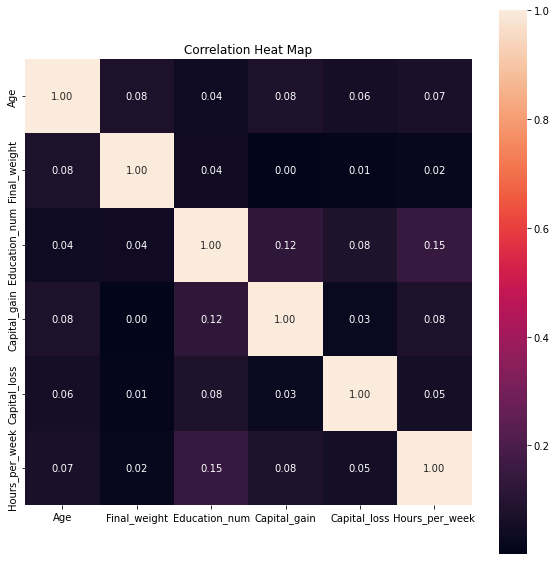

In [ ]:
# Check the correlation of features

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.drop(columns=[TARGET]).corr().abs()

plt.figure(figsize=(10, 10))
sns.heatmap(data=corr_matrix, annot=True, square=True, fmt=".2f")
plt.title("Correlation Heat Map")
plt.show()

In [ ]:
def get_correlated_features(*, data: pd.DataFrame, threshold: float) -> list:
    """This is used to return a list of highly correlated features."""
    # Select only numeric data
    num_data = df.select_dtypes(include=[int, float])

    # Store the correlated columns
    col_corr = set()

    # Correlation matrix
    corr_matrix = num_data.corr()

    for i in range(len(corr_matrix.columns)):

        # check with other features
        for j in range(i):

            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:

                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(
                    f"correlation: {abs(corr_matrix.iloc[i, j])}, "
                    f"feat1:{corr_matrix.columns[i]}, feat2:{corr_matrix.columns[j]}"
                )

                # Get the name of the correlated feature
                col_name = corr_matrix.columns[j]

                # and add it to our correlated set
                col_corr.add(col_name)

    return list(col_corr)

In [ ]:
get_correlated_features(data=df, threshold=0.85)

[]

In [ ]:
from sklearn.model_selection import train_test_split

# Mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

from sklearn.linear_model import LogisticRegression


RANDOM_STATE = 123
TEST_SIZE = 0.2

In [ ]:
df["Salary"].value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Salary, dtype: float64

In [ ]:
df.head(2)

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Educationnew
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Grad


In [ ]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((26048, 15), (6512, 15))

In [ ]:
X_train.head(2)

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Educationnew
6994,20,?,168863,Some-college,10,Never-married,?,Own-child,White,Female,0,0,20,United-States,College
17064,22,Private,270436,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,Grad
